# Introduction

## Context 

In [1]:
# TODO: brief overview of projet goals

## Imports

In [2]:
# builtin
import os

# graphs
import matplotlib.pyplot as plt

# other libraries
import missingno as msno

# data
import numpy as np
import pandas as pd
import scipy

## Data imports

* Dataset consists of one main table and 6 extra tables linked by ids
* For our Minimum Viable Product we will only use the main table
* Once the MVP is running, other tables could be used to improve model predictions.


![](../references/home_credit.png)

In [4]:
app_train = pd.read_csv("../data/raw/application_train.csv")
# TODO: use other tables

# First look at data

In [5]:
# Shape
print("app_train : ", app_train.shape)

app_train :  (307511, 122)


In [6]:
app_train.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
# Column names and dtypes
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [8]:
# number of classes for categorical features
app_train.select_dtypes("object").nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [9]:
# Sample preview
app_train.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
241669,379828,0,Revolving loans,M,N,Y,0,180000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
34838,140366,0,Revolving loans,M,Y,N,0,202500.0,157500.0,7875.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
114401,232666,0,Cash loans,F,Y,N,0,81000.0,103500.0,8982.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
31303,136324,0,Cash loans,F,N,N,1,900000.0,1006920.0,75285.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
45742,152991,0,Cash loans,F,Y,Y,1,157500.0,654498.0,26086.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
70202,181438,0,Cash loans,F,Y,Y,0,225000.0,208512.0,24876.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
107013,224155,1,Cash loans,F,N,Y,0,193500.0,942300.0,27679.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
144547,267609,0,Cash loans,F,Y,Y,0,315000.0,781920.0,50103.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
123330,243026,0,Cash loans,M,N,Y,0,180000.0,395640.0,30748.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
82361,195520,0,Cash loans,F,N,Y,0,247500.0,1288350.0,41692.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


## Get variable definitions 

In [10]:
# Load description file
feature_description = pd.read_csv(
    "../data/raw/HomeCredit_columns_description.csv", encoding="unicode_escape"
)
feature_description = feature_description.set_index("Row")[
    ["Description", "Special", "Table"]
]


def get_definition(feature):
    """
    Prints definition of a feature. Not sensitive to case.
    """
    with pd.option_context("display.max_colwidth", None):
        display(pd.DataFrame(feature_description.loc[feature.upper(), :]))


get_definition("APARTMENTS_MODE")

,APARTMENTS_MODE
Description,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor"
Special,normalized
Table,application_{train|test}.csv


## Describe

In [11]:
app_train_desc = app_train.describe().T
with pd.option_context(
    "display.max_row", None, "display.float_format", "{:20,.2f}".format
):
    display(app_train_desc)

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,"307,511.00","278,180.52","102,790.18","100,002.00","189,145.50","278,202.00","367,142.50","456,255.00"
TARGET,"307,511.00",0.08,0.27,0.00,0.00,0.00,0.00,1.00
CNT_CHILDREN,"307,511.00",0.42,0.72,0.00,0.00,0.00,1.00,19.00
AMT_INCOME_TOTAL,"307,511.00","168,797.92","237,123.15","25,650.00","112,500.00","147,150.00","202,500.00","117,000,000.00"
AMT_CREDIT,"307,511.00","599,026.00","402,490.78","45,000.00","270,000.00","513,531.00","808,650.00","4,050,000.00"
AMT_ANNUITY,"307,499.00","27,108.57","14,493.74","1,615.50","16,524.00","24,903.00","34,596.00","258,025.50"
AMT_GOODS_PRICE,"307,233.00","538,396.21","369,446.46","40,500.00","238,500.00","450,000.00","679,500.00","4,050,000.00"
REGION_POPULATION_RELATIVE,"307,511.00",0.02,0.01,0.00,0.01,0.02,0.03,0.07
DAYS_BIRTH,"307,511.00","-16,037.00","4,363.99","-25,229.00","-19,682.00","-15,750.00","-12,413.00","-7,489.00"
DAYS_EMPLOYED,"307,511.00","63,815.05","141,275.77","-17,912.00","-2,760.00","-1,213.00",-289.00,"365,243.00"


## Missing values

app_train.info()

<Axes: >

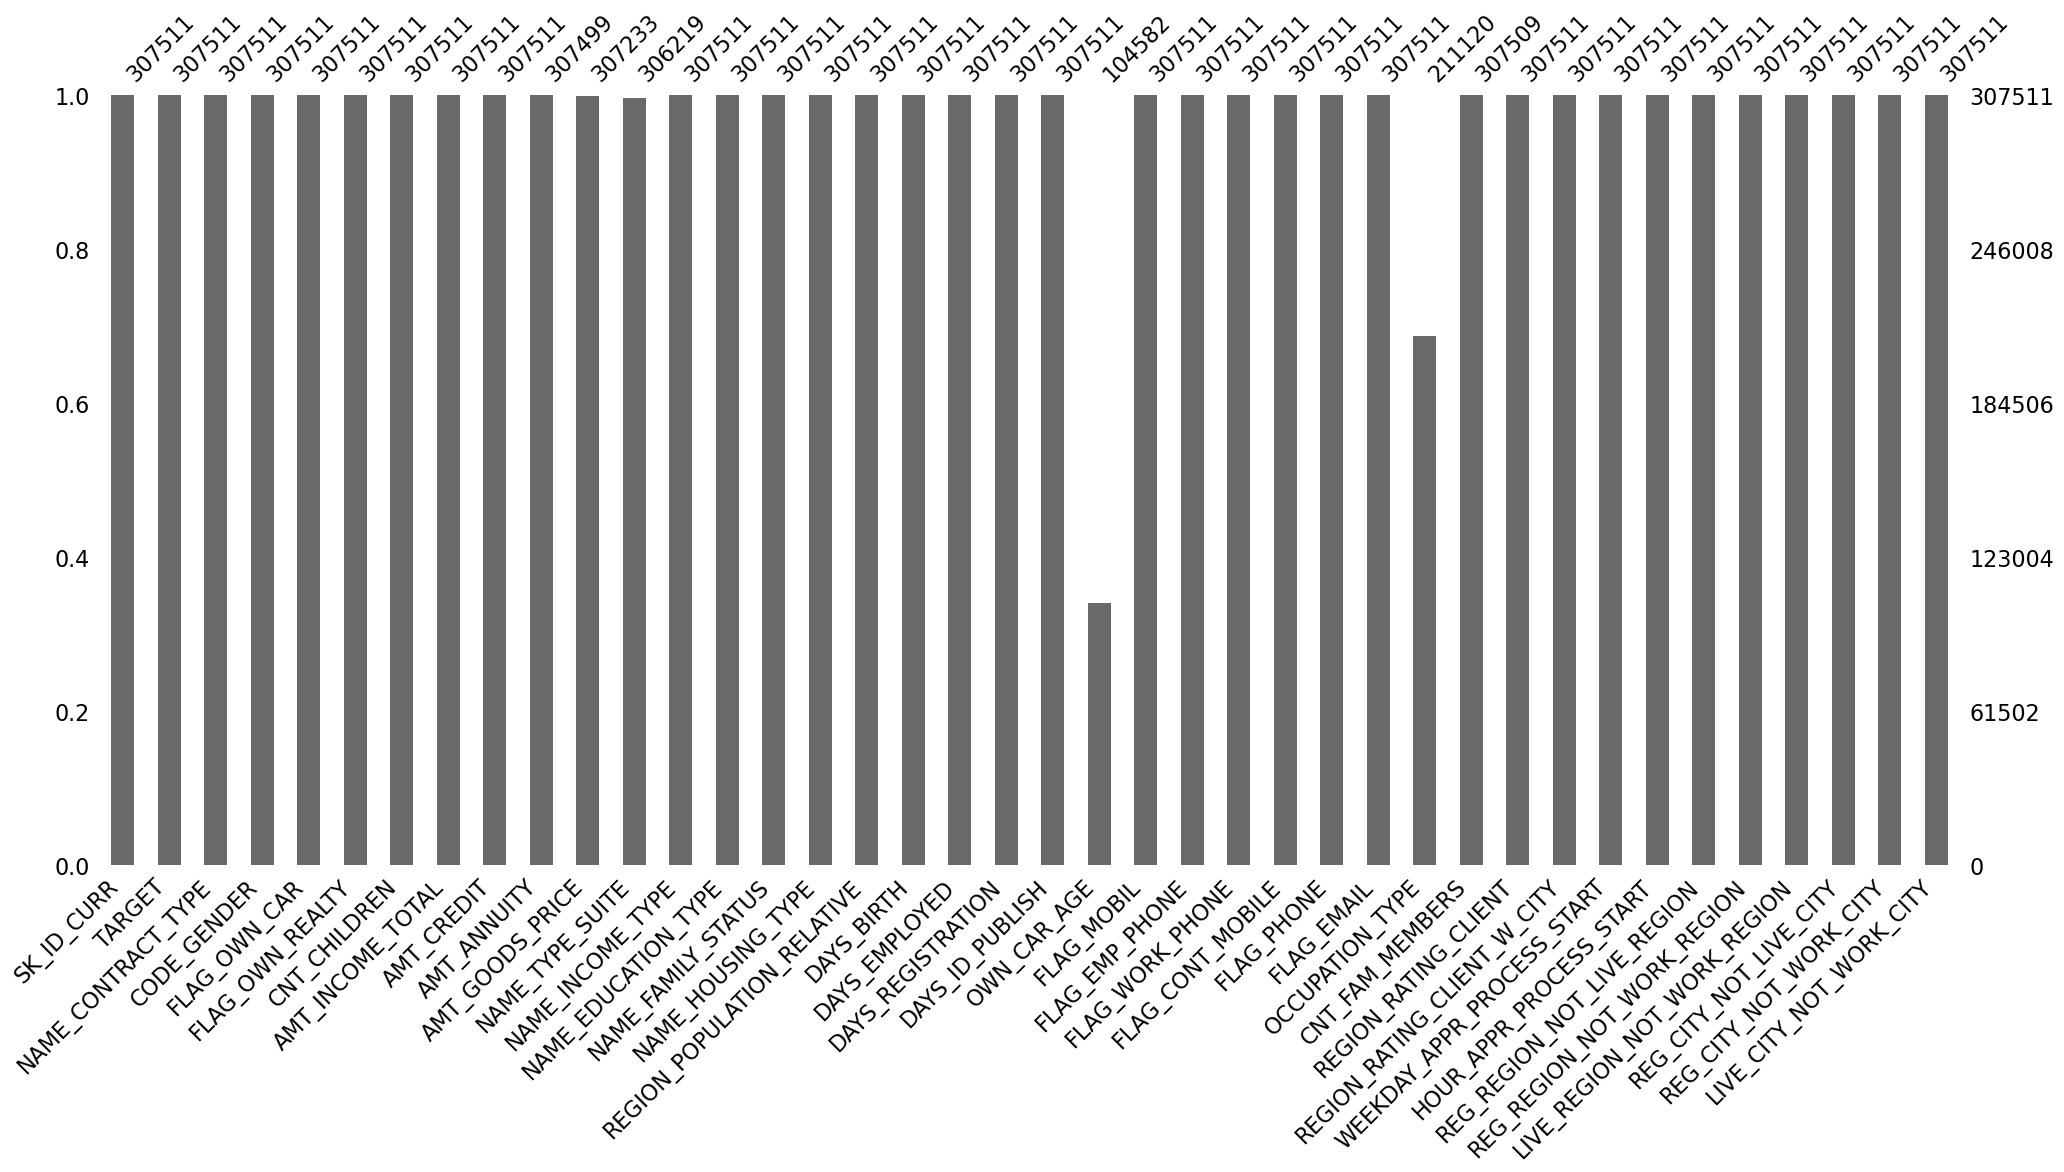

In [13]:
# df divided in 3 plots because msno has a 50 column limit (issue with matplotlib version)
msno.bar(app_train.iloc[:, :40])

<Axes: >

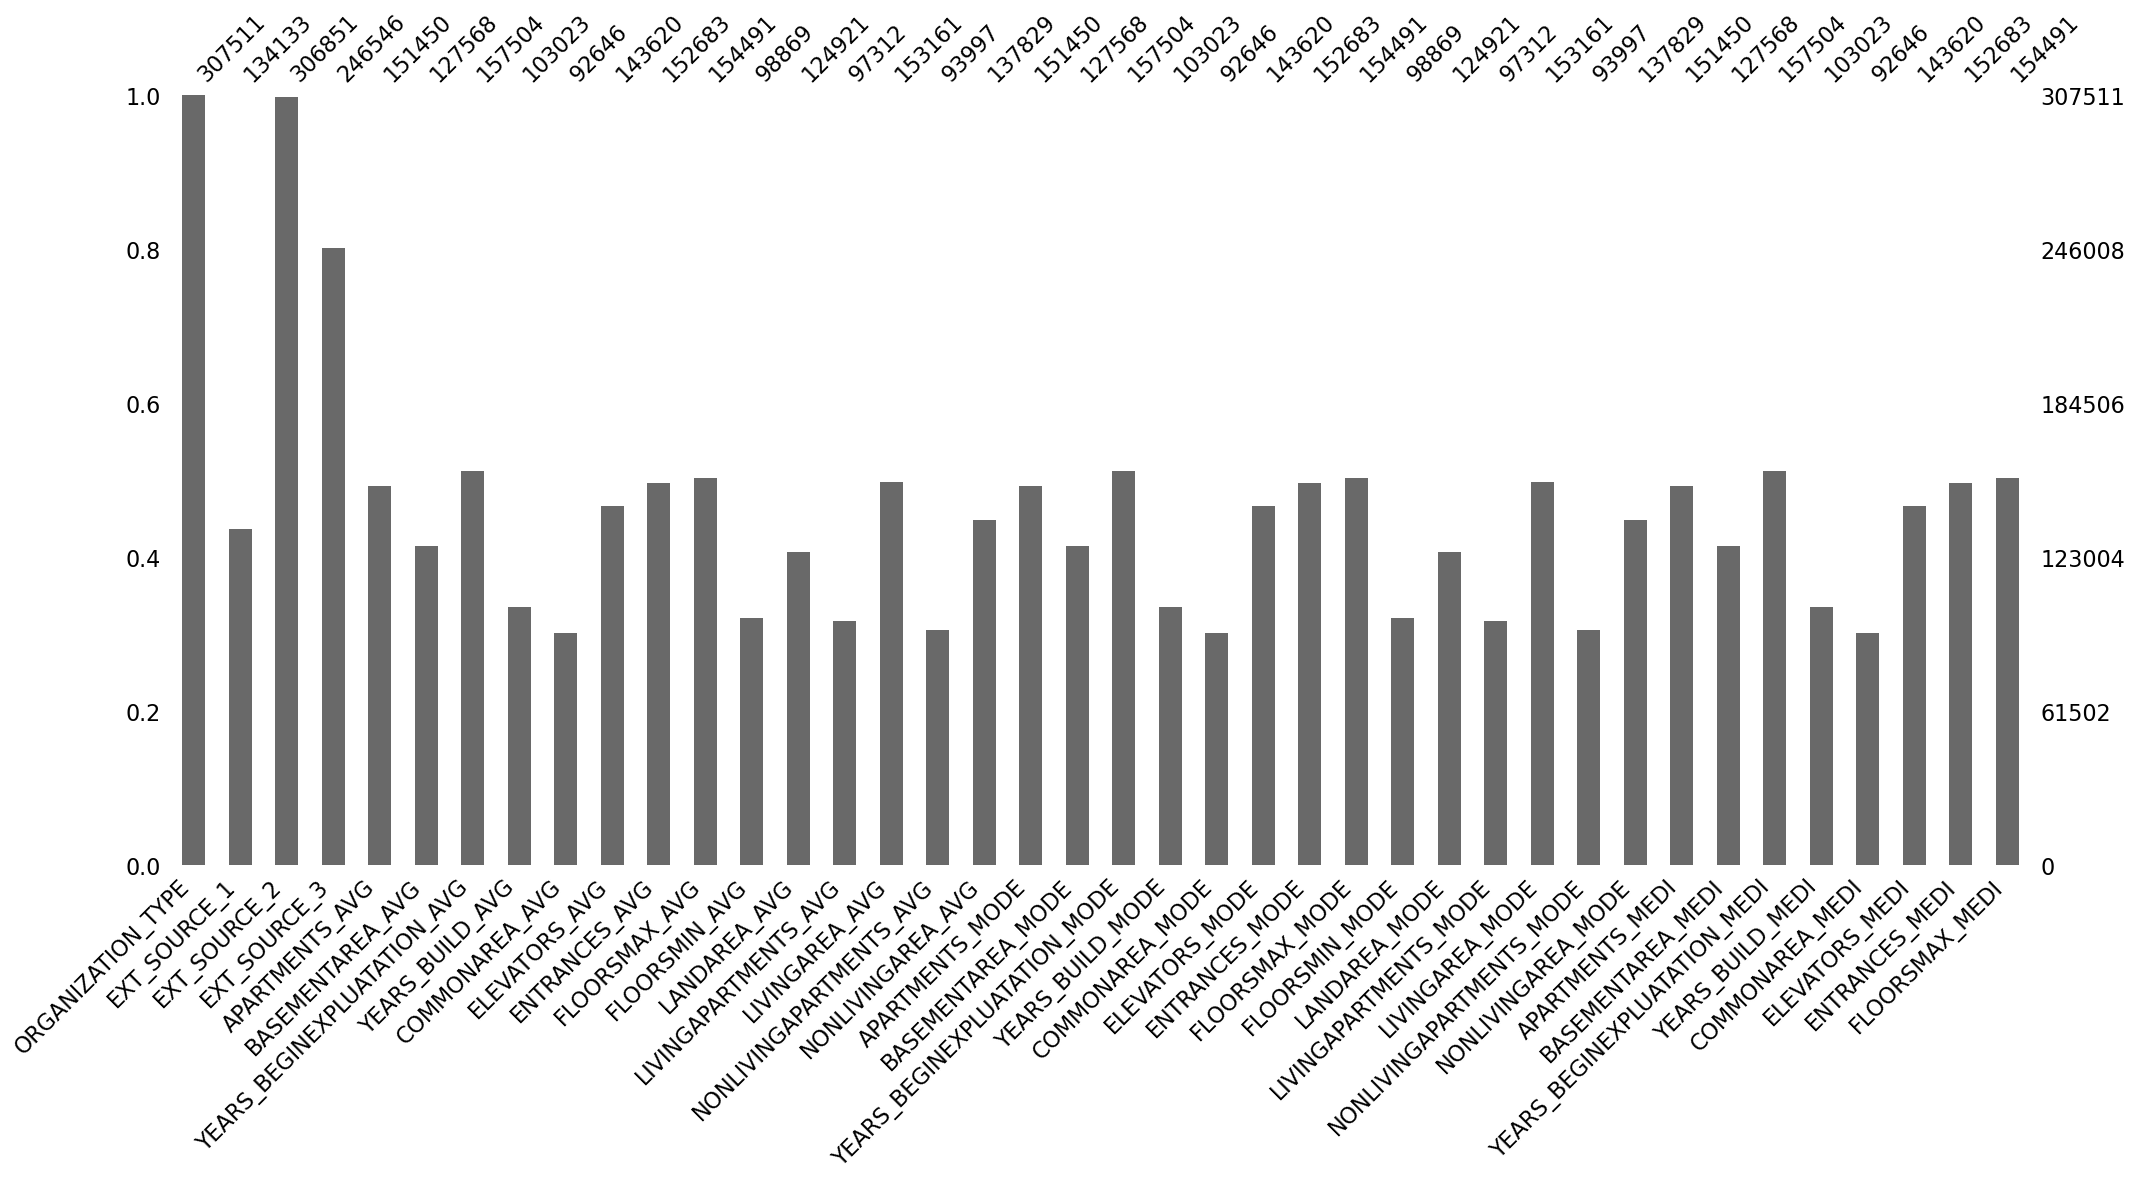

In [14]:
msno.bar(app_train.iloc[:, 40:80])

<Axes: >

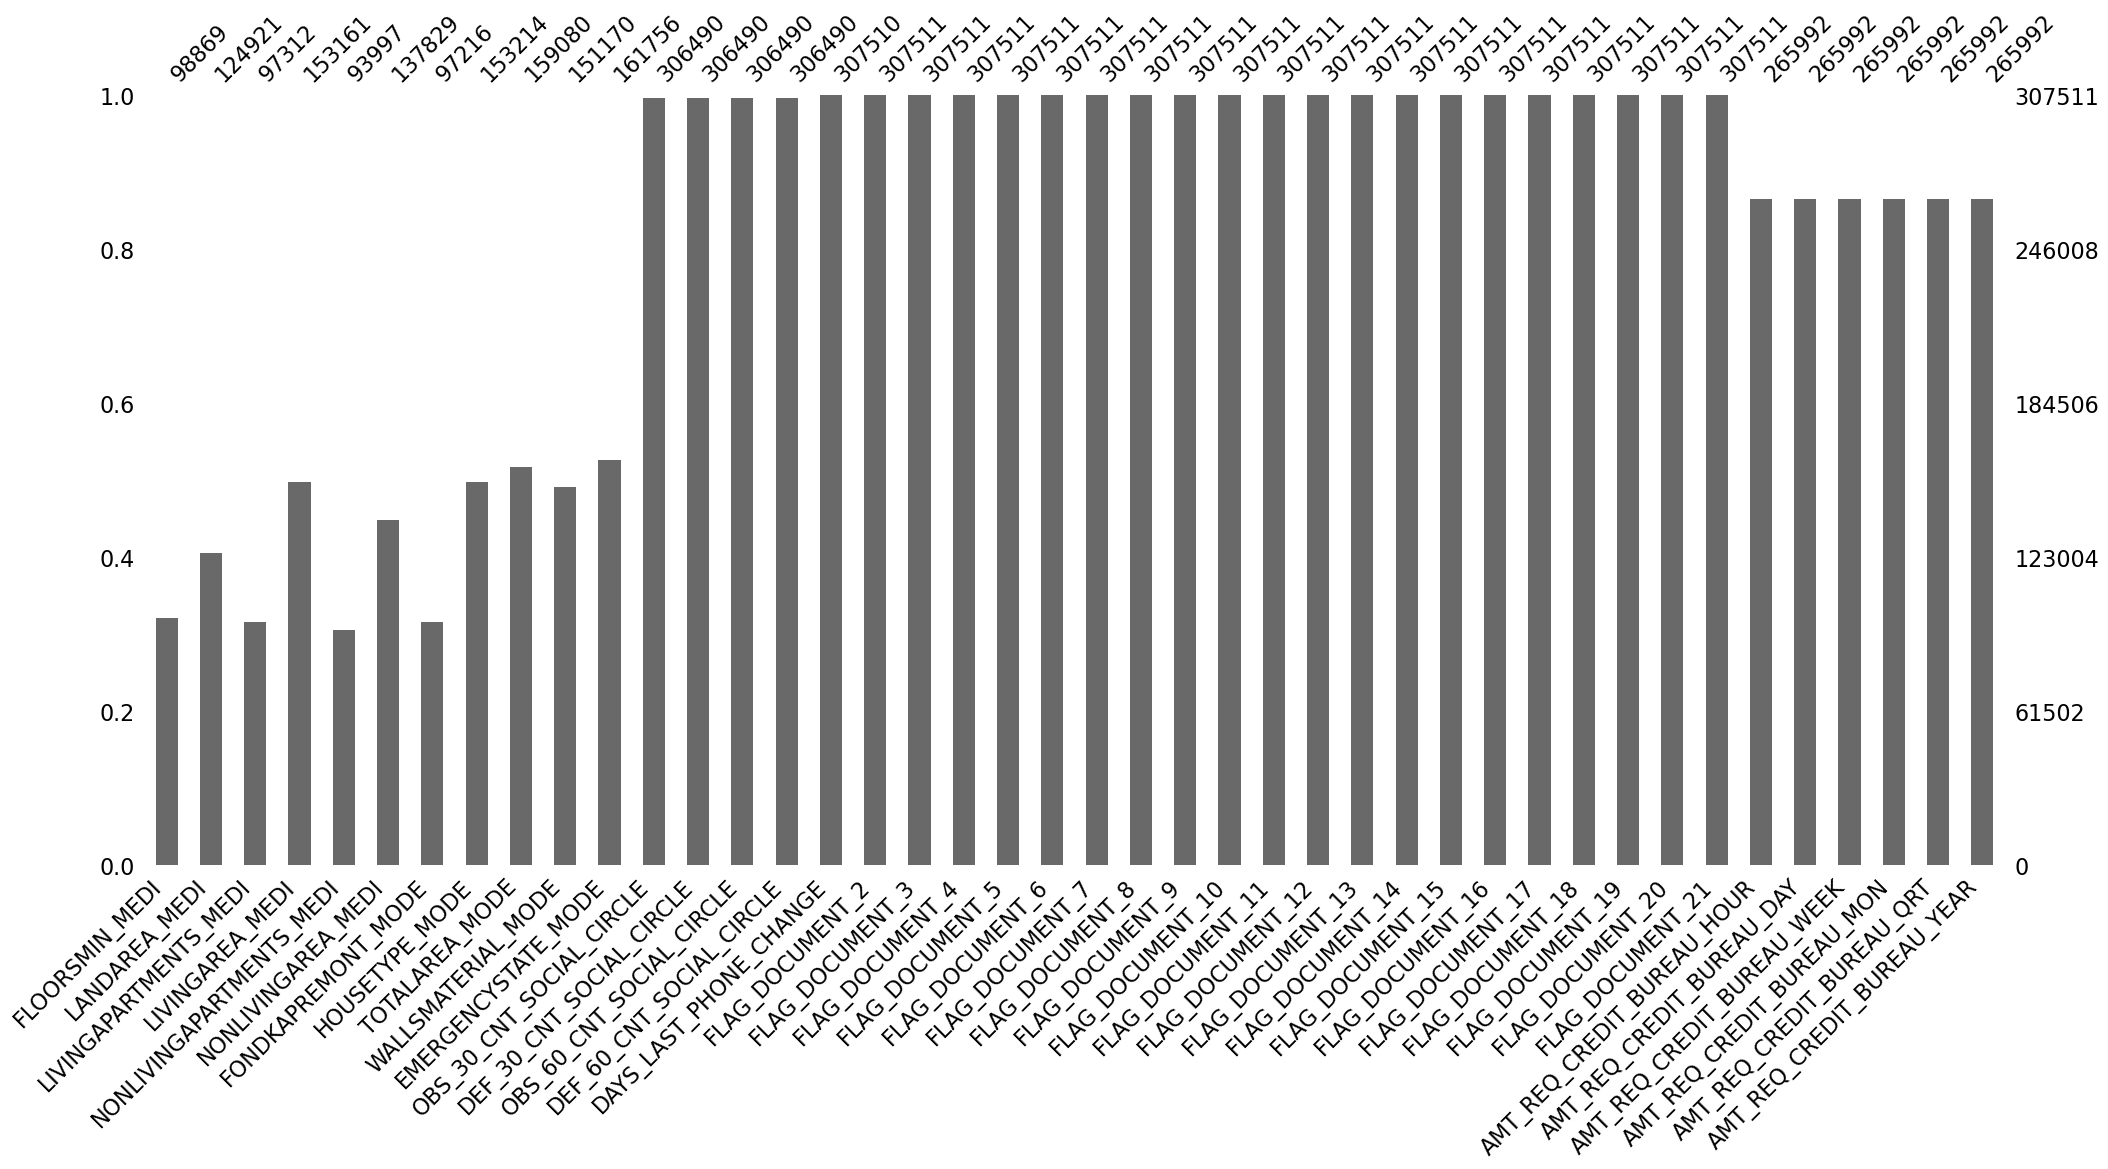

In [15]:
msno.bar(app_train.iloc[:, 80:])

In [16]:
# Columns that are the most empty
tmp = app_train.isna().mean().sort_values(ascending=False).head(20)
tmp

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_AVG               0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_AVG             0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_MODE               0.593767
LANDAREA_AVG                0.593767
dtype: float64

<div class="alert alert-block alert-warning">
<b>Comment : </b></div>

most of the columns contain NaN. We don't know yet which features are important, we will keep them all for now.

## Duplicates

In [17]:
app_train.duplicated().any()

False

In [18]:
app_train.duplicated(subset="SK_ID_CURR").any()

False

## Outliers and anomalies

### Z-score and boxplot detection

AMT_INCOME_TOTAL              492.703449
AMT_REQ_CREDIT_BUREAU_QRT     350.470589
OBS_30_CNT_SOCIAL_CIRCLE      144.506214
OBS_60_CNT_SOCIAL_CIRCLE      144.117631
AMT_REQ_CREDIT_BUREAU_MON      31.242339
CNT_CHILDREN                   25.733871
CNT_FAM_MEMBERS                19.597532
AMT_ANNUITY                    15.931509
AMT_REQ_CREDIT_BUREAU_YEAR     12.585586
OWN_CAR_AGE                     9.645167
AMT_GOODS_PRICE                 9.501557
AMT_CREDIT                      8.574059
DAYS_REGISTRATION               5.588007
DAYS_LAST_PHONE_CHANGE          4.026504
HOUR_APPR_PROCESS_START         3.693833
DAYS_ID_PUBLISH                 2.784328
DAYS_EMPLOYED                   2.133617
DAYS_BIRTH                      2.106335
dtype: float64


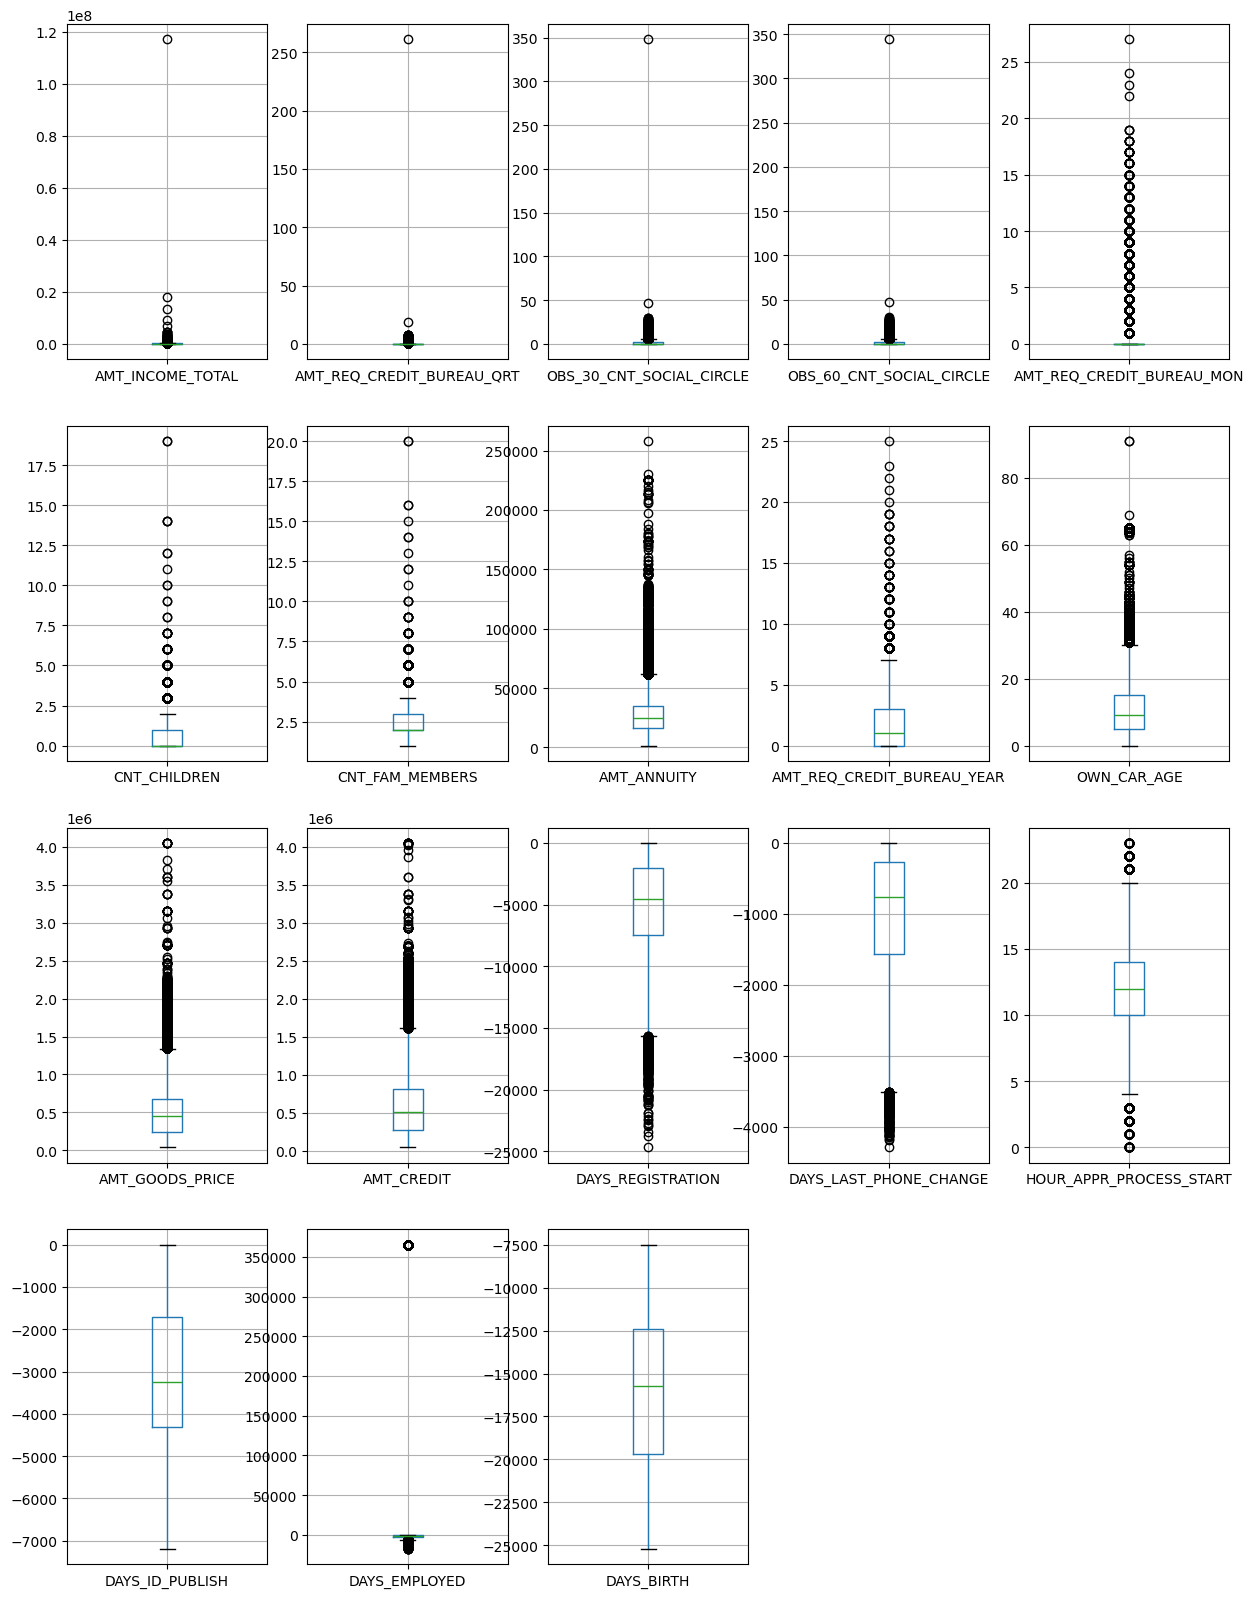

In [19]:
# Print boxplots for all numeric features
# filter out categorial num features
num_col = app_train.select_dtypes(np.number).nunique() > 10
num_col = num_col[num_col].index

# filter features with 0 to 1 values
bool_features = (app_train[num_col].max() - app_train[num_col].min()) <= 1
not_bool_features = bool_features[~bool_features].index

# select features with high Z-Score
feature_has_outliers = (
    scipy.stats.zscore(app_train[not_bool_features].fillna(0)).abs().max()
).sort_values(ascending=False)
feature_has_outliers = feature_has_outliers[feature_has_outliers > 2]

subset = feature_has_outliers.index
PLOT_LINES = len(subset)
PLOT_COL = 5
plt.figure(figsize=(15, 20))
for i, col in enumerate(app_train[subset]):
    plt.subplot(PLOT_LINES // PLOT_COL + 1, PLOT_COL, i + 1)
    app_train.boxplot(column=col)

print(feature_has_outliers.sort_values(ascending=False))

<div class="alert alert-block alert-info">
<b>Comment : </b></div>

Detected outliers :
- `AMT_INCOME_TOTAL` : outlier but possibly real value
- `AMT_REQ_CREDIT_BUREAU_QRT` : outlier but possibly real value
- `OBS_30_CNT_SOCIAL_CIRCLE` : outlier but possibly real value
- `OBS_60_CNT_SOCIAL_CIRCLE` : outlier but possibly real value
- `DAYS_EMPLOYED` : impossible value, needs fixing


In [20]:
get_definition("OBS_30_CNT_SOCIAL_CIRCLE")

,OBS_30_CNT_SOCIAL_CIRCLE
Description,How many observation of client's social surroundings with observable 30 DPD (days past due) default
Special,NaN
Table,application_{train|test}.csv


### Impossible values

In [21]:
# Detect features with both positive and negative values
values_positive_and_negative = (
    app_train.select_dtypes(np.number).min() * app_train.select_dtypes(np.number).max()
) < 0
values_positive_and_negative[values_positive_and_negative]

DAYS_EMPLOYED    True
dtype: bool

<Axes: >

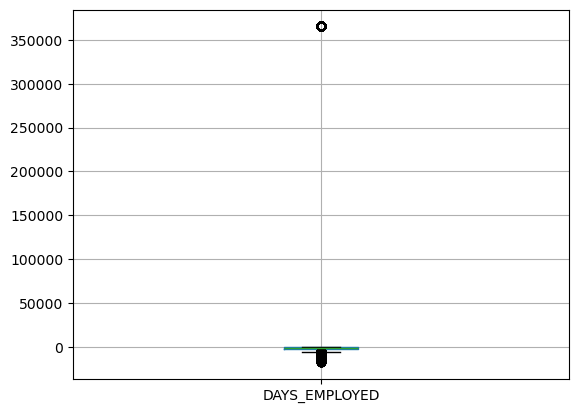

In [22]:
app_train.boxplot(column="DAYS_EMPLOYED")

### By col name

In [23]:
def cols_containing(string):
    """
    Returns list of column names that contain a pattern.
    """
    return app_train.columns[app_train.columns.str.contains(string.upper())].to_list()

In [24]:
# check for impossible values in time variables
app_train[cols_containing("year")].describe()

,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,AMT_REQ_CREDIT_BUREAU_YEAR
count,157504.000000,103023.000000,157504.000000,103023.000000,157504.000000,103023.000000,265992.000000
mean,0.977735,0.752471,0.977065,0.759637,0.977752,0.755746,1.899974
std,0.059223,0.113280,0.064575,0.110111,0.059897,0.112066,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.976700,0.687200,0.976700,0.699400,0.976700,0.691400,0.000000
50%,0.981600,0.755200,0.981600,0.764800,0.981600,0.758500,1.000000
75%,0.986600,0.823200,0.986600,0.823600,0.986600,0.825600,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000


In [25]:
# convert negative days to years
(app_train[cols_containing("days")] / -365).describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,43.936973,-174.835742,13.660604,8.203294,2.637969
std,11.956133,387.056895,9.651743,4.135481,2.265229
min,20.517808,-1000.665753,-0.000000,-0.000000,-0.000000
25%,34.008219,0.791781,5.506849,4.712329,0.750685
50%,43.150685,3.323288,12.339726,8.915068,2.073973
75%,53.923288,7.561644,20.491781,11.778082,4.301370
max,69.120548,49.073973,67.594521,19.717808,11.758904


<div class="alert alert-block alert-danger">
<b>Comment : </b>Min value of -1000 years employed is impossible, is it a single outlier or a common value?</div>

<Axes: >

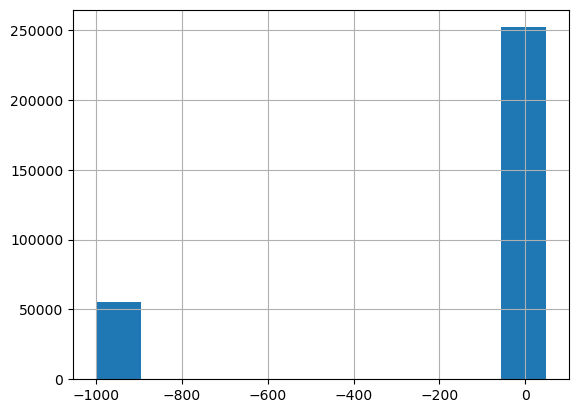

In [26]:
(app_train.DAYS_EMPLOYED / -365).hist()

In [28]:
# check if modifications were made in this notebook
# not app_train_original.equals(app_train)